In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt 
import seaborn as sns 
import numpy as np
import polars as pl

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('base_data/Spotify_Song_Attributes.csv')
view = pd.concat([df.head(), df.tail()])

view

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.1100,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0
10076,Your Latest Trick - Remastered 1996,Dire Straits,304382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.4740,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,...,0.2330,0.208,129.642,audio_features,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0
10079,"Your Voice / Bethel, NY",Jaden,213626,pop rap,0.560,0.344,3.0,-12.283,1.0,0.0306,...,0.1110,0.428,115.393,audio_features,3BcN2Pcy0kTG1zm8Tz9MsB,spotify:track:3BcN2Pcy0kTG1zm8Tz9MsB,https://api.spotify.com/v1/tracks/3BcN2Pcy0kTG...,https://api.spotify.com/v1/audio-analysis/3BcN...,213627.0,3.0


In [3]:
sk = df['artistName'].str.contains('SyKo')

In [4]:
df.isnull().sum()

trackName              0
artistName             0
msPlayed               0
genre               1500
danceability         550
energy               550
key                  550
loudness             550
mode                 550
speechiness          550
acousticness         550
instrumentalness     550
liveness             550
valence              550
tempo                550
type                 550
id                   550
uri                  550
track_href           550
analysis_url         550
duration_ms          550
time_signature       550
dtype: int64

In [5]:
df = df.dropna()

df.isnull().sum()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8580 entries, 1 to 10079
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   trackName         8580 non-null   object 
 1   artistName        8580 non-null   object 
 2   msPlayed          8580 non-null   int64  
 3   genre             8580 non-null   object 
 4   danceability      8580 non-null   float64
 5   energy            8580 non-null   float64
 6   key               8580 non-null   float64
 7   loudness          8580 non-null   float64
 8   mode              8580 non-null   float64
 9   speechiness       8580 non-null   float64
 10  acousticness      8580 non-null   float64
 11  instrumentalness  8580 non-null   float64
 12  liveness          8580 non-null   float64
 13  valence           8580 non-null   float64
 14  tempo             8580 non-null   float64
 15  type              8580 non-null   object 
 16  id                8580 non-null   object 

In [6]:
X = df[["danceability", "energy", "loudness", "liveness"]].values 
y = df[["genre"]].values 

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.ravel())

#Predicting...
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
predict = knn.predict(X_test)

predicted_labels = label_encoder.inverse_transform(predict)

df_test_predicted = pd.DataFrame(X_test, columns=["danceability", "energy", "loudness", "liveness"])
df_test_predicted["predicted_genre"] = predicted_labels 

df_test_predicted

,danceability,energy,loudness,liveness,predicted_genre
0,0.186,0.6790,-7.884,0.1280,filmi
1,0.468,0.2470,-10.090,0.1010,canadian pop
2,0.359,0.4480,-13.081,0.1630,alt z
3,0.619,0.0936,-16.143,0.0825,anime
4,0.508,0.9710,-3.027,0.6200,anime rock
...,...,...,...,...,...
6001,0.487,0.7040,-5.825,0.0686,alabama indie
6002,0.590,0.7790,-5.574,0.1020,canadian electronic
6003,0.447,0.7810,-3.469,0.2040,alternative hip hop
6004,0.796,0.6810,-6.067,0.1050,reggae fusion


In [7]:
round(knn.score(X_test, y_test)*100, 2)

10.56

In [8]:
print(confusion_matrix(y_test, predict))

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


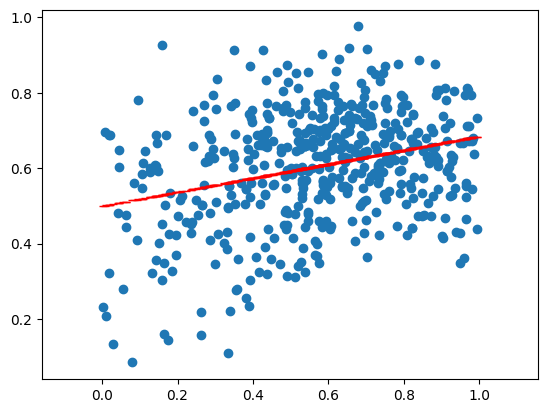

29.23


In [9]:
sample = df.sample(n=500)

danceability = sample['danceability']
energy = sample['energy']
liveness = sample['liveness']
tempo = sample['tempo']
genre = pd.get_dummies(sample['genre'])

correlation, pvalue = pearsonr(energy, danceability)

z=np.polyfit(energy,danceability,1)
p = np.poly1d(z)
plt.plot(energy,p(energy),"r_")

plt.scatter(energy, danceability)
plt.axis('equal')
plt.show()

print(round(correlation*100, 2))

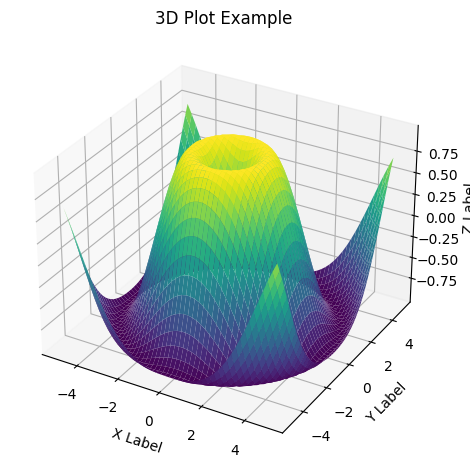

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate example data
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

# Create a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.plot_surface(x, y, z, cmap='viridis')

# Customize the plot
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Plot Example')
# ax.view_init(elev=20, azim=30)

# Show the plot
plt.tight_layout()
plt.show()

